In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from keras.models import Sequential
from keras import layers

In [8]:
df = pd.read_csv('data/reddit_depression_suicidewatch_encoded.csv')
df.head()

,label_encoded,text
0,0,I recently went through a breakup and she said...
1,0,"I do not know how to navigate these feelings, ..."
2,0,"So I have been with my bf for 5 months , and h..."
3,1,I am so exhausted of this. Just when I think I...
4,0,I have been severly bullied since i was 5 till...


In [9]:
sentences = df['text'].values
y = df['label_encoded'].values

In [37]:
sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.3, random_state=1000)

In [38]:
vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)

CountVectorizer()

In [39]:
X_train = vectorizer.transform(sentences_train)
X_test = vectorizer.transform(sentences_test)
X_train

<14254x30005 sparse matrix of type '<class 'numpy.int64'>'
	with 1243233 stored elements in Compressed Sparse Row format>

In [40]:
input_dim = X_train.shape[1]  # Number of features
print(input_dim)

30005


In [41]:
model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [42]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                300060    
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 300,071
Trainable params: 300,071
Non-trainable params: 0
_________________________________________________________________


In [55]:
from keras.backend import clear_session
clear_session()

In [56]:
history = model.fit(X_train, y_train,epochs=20, verbose=True, validation_data=(X_test, y_test), batch_size=64)

Epoch 1/20
223/223 [==============================] - 2s 7ms/step - loss: 0.0281 - accuracy: 0.9949 - val_loss: 2.7817 - val_accuracy: 0.6585
Epoch 2/20
223/223 [==============================] - 1s 6ms/step - loss: 0.0290 - accuracy: 0.9946 - val_loss: 2.6492 - val_accuracy: 0.6549
Epoch 3/20
223/223 [==============================] - 1s 6ms/step - loss: 0.0358 - accuracy: 0.9938 - val_loss: 2.5879 - val_accuracy: 0.6566
Epoch 4/20
223/223 [==============================] - 1s 6ms/step - loss: 0.0340 - accuracy: 0.9937 - val_loss: 2.6436 - val_accuracy: 0.6531
Epoch 5/20
223/223 [==============================] - 1s 6ms/step - loss: 0.0324 - accuracy: 0.9928 - val_loss: 3.0477 - val_accuracy: 0.6538
Epoch 6/20
223/223 [==============================] - 1s 6ms/step - loss: 0.0275 - accuracy: 0.9938 - val_loss: 2.7491 - val_accuracy: 0.6564
Epoch 7/20
223/223 [==============================] - 1s 6ms/step - loss: 0.0239 - accuracy: 0.9956 - val_loss: 2.7768 - val_accuracy: 0.6525
Epoch 

In [57]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))

Training Accuracy: 0.9974


In [58]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Testing Accuracy:  0.6520


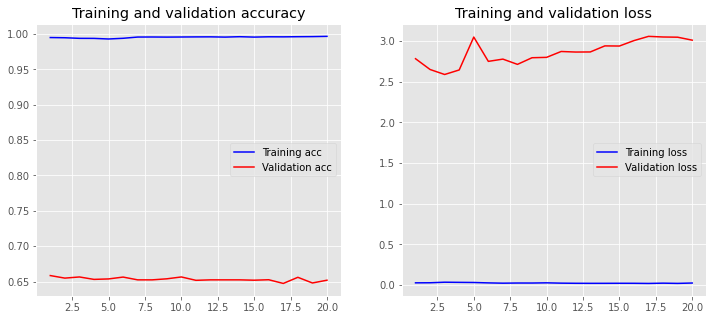

In [59]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    # plt.show()
plot_history(history)